# 01b - Keras sequential model - student - v2.0

Keras Sequential model is implemented to fit and predict regression data.

V2.0 chnages
- Visualizer removed



In [40]:
# to install keras-visualizer or scikeras, uncomment and rujn some of these commands
# but first make sure it is going to install into correct env:
import sys
print(sys.executable)

# %pip3 install keras-visualizer
%pip install scikeras
# %pip install "scikeras==0.12.0"




c:\Users\Parrot\anaconda3\envs\ANACONDA_NEURAL_NETWORKS_ENV\python.exe
Note: you may need to restart the kernel to use updated packages.


## Create random dataset

Create random dataset using uniform distribution with $[low, high)$ definitions.

Constants:  
- $N=150$ number of items to create
  - i ranges from $(0, N)$

- $a=\frac{i}{10}+random.uniform(-4, 3)$  
- $b=\frac{i}{30}+random.uniform(-4, 4)$  
- $c=\frac{i}{40}+random.uniform(-3, 3)-5$  

- $y=\frac{\frac{a+b+c}{2}}{3}$

Target variable $y$ depends on randomly from the a, b and c.

In [41]:
# Import libraries required in this example:
import random # generate (reproducible!) random numbers
import numpy as np # handle numerical data and statistical/vector operations
import matplotlib.pyplot as plt # visualize data and model performance
from keras.models import Sequential # simple neural network model built layer-by-layer
from keras.layers import Dense # dense is a fully connected layer of NN
from keras.layers import Input # input is a input layer of NN
from scikeras.wrappers import KerasClassifier, KerasRegressor # combine keras network with sklearn api (fit, predict, score)
from sklearn.metrics import mean_squared_error # compute MSE regression error (lower is better)
from sklearn.model_selection import train_test_split # split data to train and test data sets



In [42]:
# Generate a sample dataset from random data:
random.seed(123)

def CreateDataset(N):
    a,b,c,y = [],[],[],[]
    for i in range(N):
        aa = i/10+random.uniform(-4,3)
        bb = i/30+random.uniform(-4,4)
        cc = i/40+random.uniform(-3,3)-5
        yy = (aa+bb+cc/2)/3

        a.append([aa])
        b.append([bb])
        c.append([cc])
        y.append([yy])

    return np.hstack([a,b,c]), np.array(y)

In [43]:
# ToDo: Create 150 items using CreateDataset

N = 150
x, y = CreateDataset(N)

# ToDo: Create x-axel index values for printing
x_axis = range(N)

# split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)




In [44]:
# ToDo: print shapes of x, y and x_ax
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(x_axis)

(120, 3)
(30, 3)
(120, 1)
(30, 1)
range(0, 150)


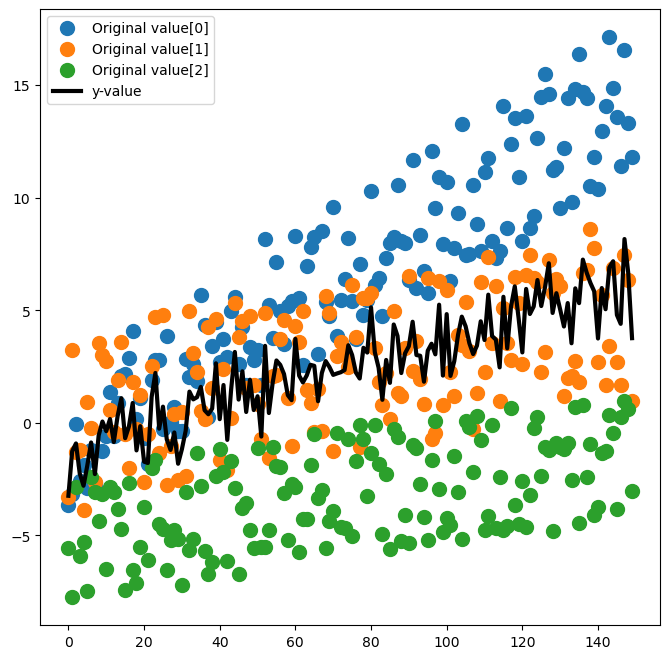

In [45]:
# ToDo: print original data and generated curve
plt.figure(figsize=(8,8))
# columns 0, 1 and 2 on own lines
plt.plot(x_axis, x[:, 0], 'o', label='original value[0]', markersize=10)
plt.plot(x_axis, x[:, 1], 'o', label='original value[1]', markersize=10)
plt.plot(x_axis, x[:, 2], 'o', label='original value[2]', markersize=10)
plt.plot(x_axis, y, lw=3, color='black', label='y')
plt.legend(['Original value[0]','Original value[1]','Original value[2]','y-value'])
plt.show()


In [46]:
# ToDo: Build sequential model using following
# - dense layer of 128 neurons and activation using relu
# - dense layer of 32 neurons and activation using relu
# - dense layer of 8 neurons and activation using relu
# - output layer of 1 neuron and activation using linear
# - compile the model, use mse in loss function and and adam optimizer
# Return the created model
def BuildModel():
    # build the model
    model = Sequential()
    # Dense means all neurons are connected to next layer
    # add layers with add(): 128 is amount of neurons, input_dim = input 3 neurons
    # notice 3 input cells, given as a tuple
    # shape=(3,) equals np.array([1,2,3]).shape (prints (3,))
    # (3,) means in other terms, one row with 3 columns
    # while (150,3) would be for instance 130 rows with 3 columns
    model.add(Input(shape=(3,)))
    model.add(Dense(128,  activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(8, activation='relu'))

    # pay attention that problem we solve is not classification but linear
    # therefore, the output neuron (the last neuron) is just a single one
    model.add(Dense(1, activation='linear'))

    # currently we have told the model of neural network
    # but this last step is to compile the neural network and add loss function
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model


In [47]:
# ToDo: create the model and print the summary
model = BuildModel()
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,913 (19.19 KB)

 Trainable params: 4,913 (19.19 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# ToDo: Do the following:
# - use Keras regressor with 100 epoch and batch size of 3
# to fit the model and predict the y values
# - calculate and print the mean squared error of the prediction

# so what we basically do is, we put data 100 times through the neural network to train
# batch means, receive always 3 data points, then update biases and weights
regressor = KerasRegressor(model=BuildModel, epochs=100, batch_size=3, verbose=0)
regressor.fit(X_train, y_train)

# use trained neural network to predict values and compare
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 0.0014526682165025976


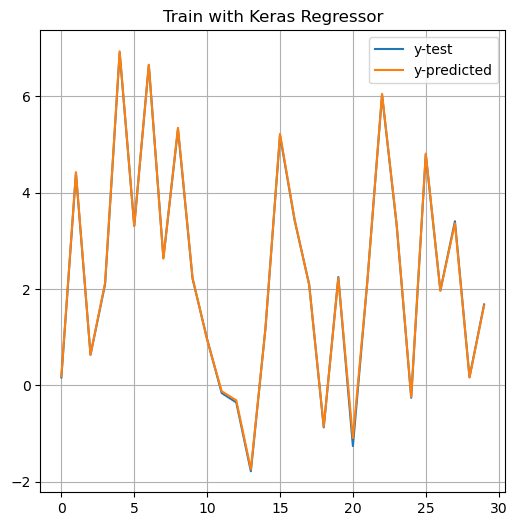

In [49]:
# ToDo: visualize with plot the original and predicted values
plt.figure(figsize=(6,6))
plt.title("Train with Keras Regressor")
plt.plot(y_test, label='y-test')
plt.plot(y_pred, label='y-predicted')
plt.legend()
plt.grid()
plt.show()

In [50]:
# ToDo: Do the following:
# - fit the model and predict the y values WITHOUT Keras regressor (100 epochs and batch size of 3)
# - calculate and print the mean squared error of the prediction
# Fit the model without the KerasRegressor wrapper:
model_b = BuildModel()
model_b.fit(X_train, y_train, epochs=100, batch_size=3, verbose=True, shuffle=False)

y_pred_b = model_b.predict(X_test)
mse_b = mean_squared_error(y_test, y_pred_b)
print(f'MSE: {mse_b}')


Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.8871   
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0574 
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0102 
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0045 
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0029 
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0019 
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0012 
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.7571e-04
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.4484e-04
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1256e-04
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3543e-04
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.3698e-04
Epoch 13/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.7554e-04
Epoch 14/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.2501e-04
Epoch 15/100
40/40 ━━━━━━━━━━━━━━━

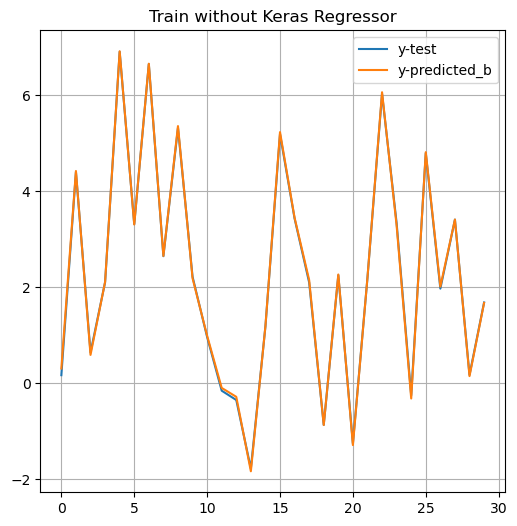

In [52]:
# ToDo: plot the original and predicted values
plt.figure(figsize=(6,6))
plt.title("Train without Keras Regressor")
plt.plot(y_test, label='y-test')
plt.plot(y_pred_b, label='y-predicted_b')
plt.legend()
plt.grid()
plt.show()


## Conclusions

The model taught with Keras achieved MSE of 0.0015
The model taught without Keras achieved MSE of 0.0018

The difference of 0.0003 MSE is explained by that, having Keras Regressor wrapper or not, it is the same model.
Keras Regressor wrapper just gives the api of sklearn (fit, predict, etc).
While without it we rely on the Keras' own api.

In both apis there are key commands such as "fit" and "predict", so it may not be a stark difference.

In advanced use-cases, sklearn wrapper may be advantageous nevertheless, via offering larger set of tools.
For example, Pipeline, cross_val_score or regressor.score.

Pipeline combines many tools such as scaling, normalization, PCA, and the model itself. Less code, more abstract level.

Cross_val_score(regressor, X, y, cv=5) would train the model 5 times and test it 5 times and return 5 MSE values.

Regressor.score is received via model.score(X_test, y_test). It tells the R^2 value, aka degree of explanation.

Overall conclusion: The neural network was very capable at predicting these non-linear values. Which shows us in practise, why the neural networks are so useful.
